## Here I will test some approaches to calculate heterozygosity in windows along the genome, and compare distributions between males and females. 

The approach is to make distributions of heterozygosity for males and females and see how they differ. If they do, then I may be able to use this as a way to sex non-sexed samples.

In [83]:
from __future__ import division
from matplotlib import pyplot as plt


In [84]:
from unidip import UniDip

In [3]:
vcf = open("/Users/danieljeffries/Desktop/Yberica/N_spain/batch_1.vcf", 'r').readlines()
GT_dict = {}

for line in vcf:
    if "#CHROM" in line:
        samples = line.split()[9:]
        
for sample in samples:
    GT_dict[sample] = {}
    GT_dict[sample]["called"] = 0
    GT_dict[sample]["het"] = 0
        
        
vcf = open("/Users/danieljeffries/Desktop/Yberica/N_spain/batch_1.vcf", 'r').readlines()[:10000]

for line in vcf:
    if "#" not in line:
        GT_fields = line.split()[9:]
        sample_index = 0
        
        for GT in GT_fields:
            sample = samples[sample_index]

            if GT.split(":")[0] in ["0/1", "1/0"]:

                GT_dict[sample]["called"] += 1
                GT_dict[sample]["het"] += 1
                
            elif GT.split(":")[0] in ["0/0", "1/1"]:

                GT_dict[sample]["called"] += 1
                
            sample_index += 1
    
for sample in GT_dict:
    GT_dict[sample]["heterozygosity"] = GT_dict[sample]["het"]/GT_dict[sample]["called"]
        

In [4]:
GT_dict

{'Cv_08_05': {'called': 3853,
  'het': 2590,
  'heterozygosity': 0.6722034778094991},
 'Cv_08_14': {'called': 3853,
  'het': 2466,
  'heterozygosity': 0.6400207630417856},
 'Lv_B07_29': {'called': 3808,
  'het': 2574,
  'heterozygosity': 0.6759453781512605},
 'Lv_B07_31': {'called': 3793,
  'het': 2482,
  'heterozygosity': 0.654363300817295},
 'Lv_B07_33': {'called': 3799,
  'het': 2476,
  'heterozygosity': 0.6517504606475388},
 'Lv_B07_35': {'called': 3471,
  'het': 2153,
  'heterozygosity': 0.620282339383463},
 'Lv_B07_37': {'called': 3295,
  'het': 1927,
  'heterozygosity': 0.5848254931714719},
 'Lv_B07_39': {'called': 3654,
  'het': 2290,
  'heterozygosity': 0.6267104542966612},
 'P2': {'called': 3764, 'het': 2344, 'heterozygosity': 0.6227417640807651},
 'Stn_A07_01': {'called': 3792,
  'het': 2404,
  'heterozygosity': 0.6339662447257384},
 'Stn_B07_01': {'called': 3776,
  'het': 2396,
  'heterozygosity': 0.6345338983050848},
 'Stn_B07_03': {'called': 3737,
  'het': 2589,
  'hetero

In [5]:
sexes = open("/Users/danieljeffries/Desktop/Yberica/N_spain/sex_info.txt", 'r').readlines()

sex_dict = {}

for sample in sexes:
    sex_dict[sample.split()[0]] = sample.split()[1]

In [6]:
M_hets = []
F_hets = []

for sample in GT_dict:
    if sex_dict[sample] == "M":
        M_hets.append(GT_dict[sample]["heterozygosity"])
    elif sex_dict[sample] == "F":
        F_hets.append(GT_dict[sample]["heterozygosity"])

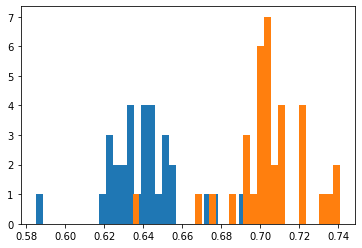

In [7]:
plt.hist(F_hets, bins = 30)
plt.hist(M_hets, bins = 30)
plt.show()

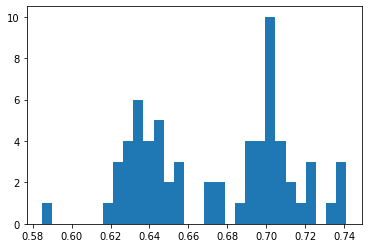

In [8]:
plt.hist(F_hets+M_hets, bins = 30)

plt.show()

In [14]:
distrib = sorted(F_hets+M_hets)

In [15]:
intervals = UniDip(distrib).run()

In [16]:
intervals

[(0, 27), (34, 56)]

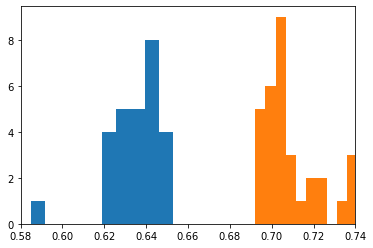

In [22]:
plt.hist(distrib[:27])
plt.hist(distrib[34:])
plt.xlim(0.58,0.74)
plt.show()

In [23]:
vcf = open("/Users/danieljeffries/Desktop/Yberica/CS_populations/batch_1.vcf", 'r').readlines()
GT_dict = {}

for line in vcf:
    if "#CHROM" in line:
        samples = line.split()[9:]
        
for sample in samples:
    GT_dict[sample] = {}
    GT_dict[sample]["called"] = 0
    GT_dict[sample]["het"] = 0
        
        
vcf = open("/Users/danieljeffries/Desktop/Yberica/CS_populations/batch_1.vcf", 'r').readlines()[:10000]

for line in vcf:
    if "#" not in line:
        GT_fields = line.split()[9:]
        sample_index = 0
        
        for GT in GT_fields:
            sample = samples[sample_index]

            if GT.split(":")[0] in ["0/1", "1/0"]:

                GT_dict[sample]["called"] += 1
                GT_dict[sample]["het"] += 1
                
            elif GT.split(":")[0] in ["0/0", "1/1"]:

                GT_dict[sample]["called"] += 1
                
            sample_index += 1
    
for sample in GT_dict:
    GT_dict[sample]["heterozygosity"] = GT_dict[sample]["het"]/GT_dict[sample]["called"]
        

In [24]:
GT_dict

{'CSRibe_147': {'called': 8466,
  'het': 3702,
  'heterozygosity': 0.4372785258681786},
 'CSRibe_148': {'called': 8307,
  'het': 4046,
  'heterozygosity': 0.48705910677741665},
 'CSRibe_149': {'called': 8416,
  'het': 4025,
  'heterozygosity': 0.47825570342205326},
 'CSRibe_150': {'called': 8228,
  'het': 3727,
  'heterozygosity': 0.4529654837141468},
 'CSRibe_151': {'called': 7966,
  'het': 3784,
  'heterozygosity': 0.47501883002761736},
 'CSRibe_152': {'called': 8374,
  'het': 3965,
  'heterozygosity': 0.4734893718652973},
 'CSRibe_153': {'called': 8373,
  'het': 3987,
  'heterozygosity': 0.47617341454675743},
 'CSRibe_154': {'called': 6801,
  'het': 3139,
  'heterozygosity': 0.4615497720923394},
 'CSRibe_155': {'called': 8624,
  'het': 4354,
  'heterozygosity': 0.5048701298701299},
 'CSRibe_156': {'called': 8270,
  'het': 3937,
  'heterozygosity': 0.47605804111245464},
 'CSRibe_157': {'called': 7292,
  'het': 3530,
  'heterozygosity': 0.484092155787164},
 'CSRibe_158': {'called': 81

In [25]:
sexes = open("/Users/danieljeffries/Desktop/Yberica/CS_populations/CS_sex_info.txt", 'r').readlines()

sex_dict = {}

for sample in sexes:
    sex_dict[sample.split()[0]] = sample.split()[1]

In [26]:
M_hets = []
F_hets = []

for sample in GT_dict:
    if sex_dict[sample] == "M":
        M_hets.append(GT_dict[sample]["heterozygosity"])
    elif sex_dict[sample] == "F":
        F_hets.append(GT_dict[sample]["heterozygosity"])

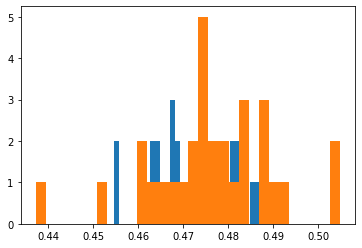

In [27]:
plt.hist(F_hets, bins = 30)
plt.hist(M_hets, bins = 30)
plt.show()

### Getting windows from SAM file.

In [8]:
SAM = open("/Users/danieljeffries/Desktop/Yberica/CS_populations/CS_tags_aligned.sam", 'r').readlines()

Alignments = {}


for i in SAM:
    if not i.startswith("@"):
        SEQ = i.split()[0]
        CHR = i.split()[2]
        STRT = i.split()[3]
        
        if SEQ not in Alignments:
            Alignments[SEQ] = {}
            Alignments[SEQ]["CHR"] = CHR
            Alignments[SEQ]["STRT"] = STRT
        

In [11]:
print(len(Alignments))

7077


In [15]:
Chr_3_aligns = {}
for SEQ in Alignments:
    if Alignments[SEQ]["CHR"] == "chr3":
        Chr_3_aligns[SEQ] = {}
        Chr_3_aligns[SEQ]["STRT"] = Alignments[SEQ]["STRT"]
        
    

In [17]:
len(Chr_3_aligns)

705

In [22]:
max([int(i["STRT"]) for i in Chr_3_aligns.values()])

539359905

In [23]:
539359905/705

765049.5106382979

So theres like 1 tag per 750 kb. So I'm gona need windows of about 10Mb to get a decent number of loci.

In [118]:
window_dict = {}
for i in range(1, 540000000, 10000000):
    window_dict[",".join((str(i), str(i+9999999)))] = {}

In [119]:
for window in window_dict:
    wind_strt = int(window.split(",")[0])
    wind_end = int(window.split(",")[1])
    window_dict[window]["tags"] = []
    window_dict[window]["samples"] = {}
    
    for tag in Chr_3_aligns:
            
        if wind_strt <= int(Chr_3_aligns[tag]["STRT"]) <= wind_end:
            window_dict[window]["tags"].append(tag)

In [120]:
vcf = open("/Users/danieljeffries/Desktop/Yberica/CS_populations/batch_1.vcf", 'r').readlines()

for line in vcf:
    if "#CHROM" in line:
        samples = line.split()[9:]
        
for line in vcf:
    if "#" not in line:
        ID = line.split()[2].split("_")[0]
        GT_fields = line.split()[9:]
        
        
        for window in window_dict:
            if ID in window_dict[window]["tags"]:
                
                ## loop over samples in each line
                
                sample_index = 0
                
                for GT in GT_fields:
                    sample = samples[sample_index]
                    
                    if sample not in window_dict[window]["samples"]:
                        window_dict[window]["samples"][sample] = {}
                        window_dict[window]["samples"][sample]["called"] = 0
                        window_dict[window]["samples"][sample]["het"] = 0

                    if GT.split(":")[0] in ["0/1", "1/0"]:

                        window_dict[window]["samples"][sample]["called"] += 1
                        window_dict[window]["samples"][sample]["het"] += 1

                    elif GT.split(":")[0] in ["0/0", "1/1"]:

                        window_dict[window]["samples"][sample]["called"] += 1

                    sample_index += 1

        

In [121]:
for window in window_dict:
    for sample in window_dict[window]["samples"]:
        if window_dict[window]["samples"][sample]["called"] > 1:
            window_dict[window]["samples"][sample]["heterozygosity"] = window_dict[window]["samples"][sample]["het"]/window_dict[window]["samples"][sample]["called"]
        else:
            window_dict[window]["samples"][sample]["heterozygosity"] = 0
        

In [122]:
sexes = open("/Users/danieljeffries/Desktop/Yberica/CS_populations/CS_sex_info.txt", 'r').readlines()

sex_dict = {}

for sample in sexes:
    sex_dict[sample.split()[0]] = sample.split()[1]

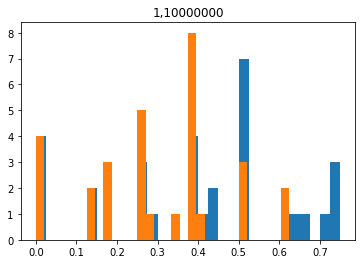

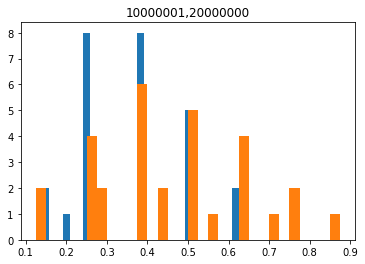

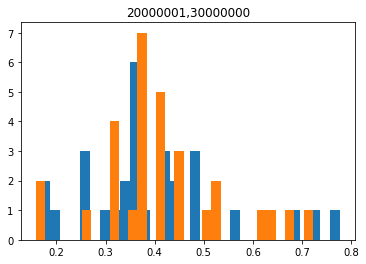

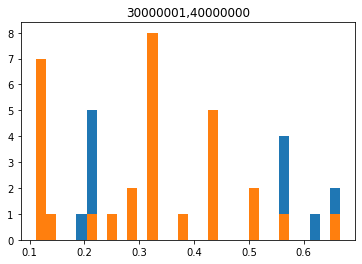

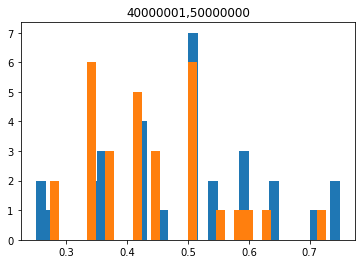

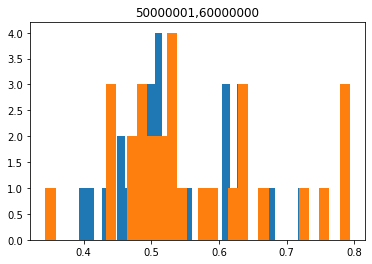

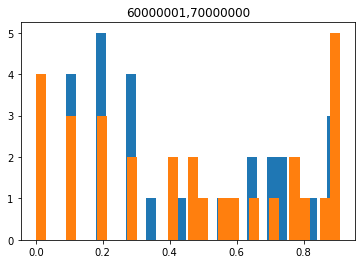

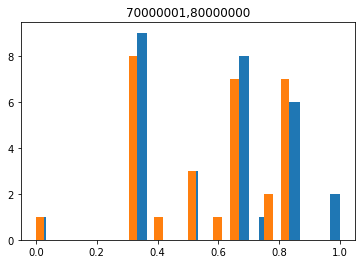

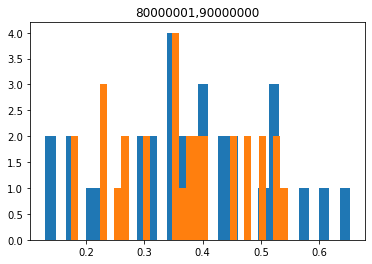

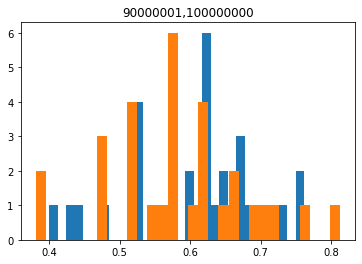

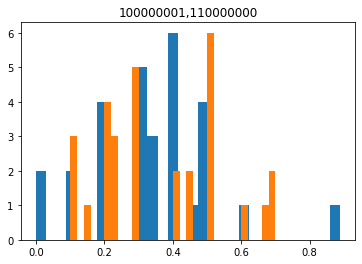

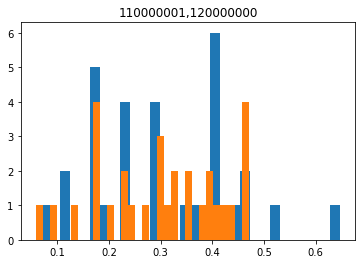

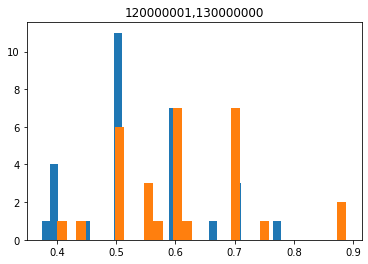

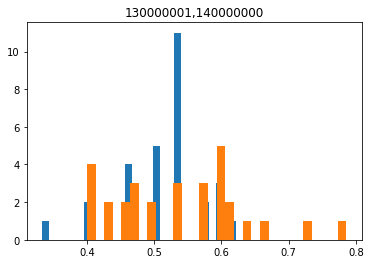

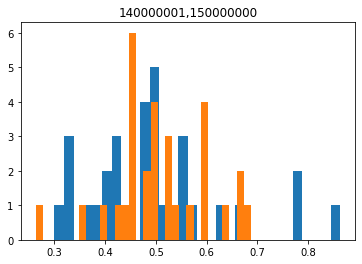

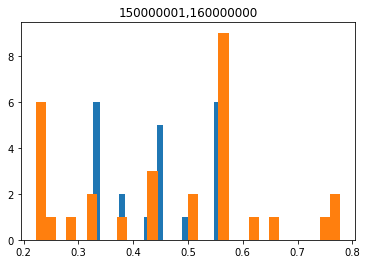

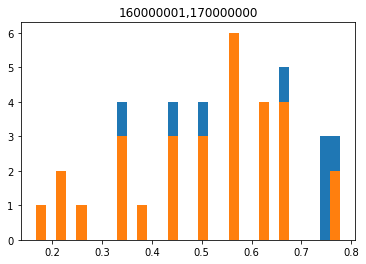

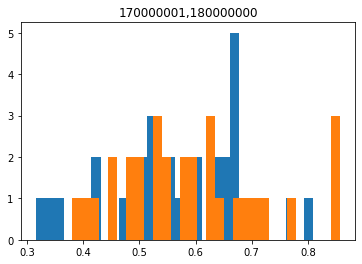

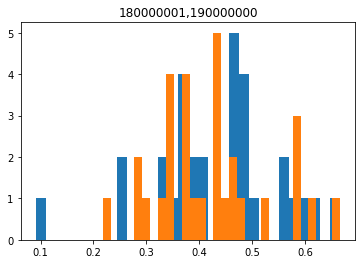

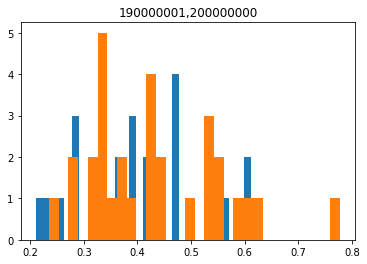

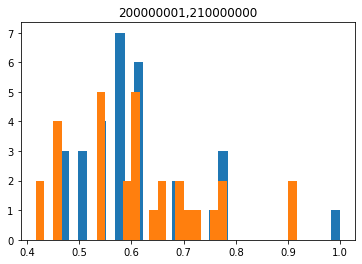

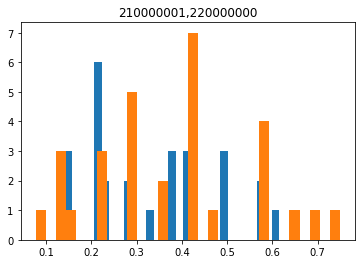

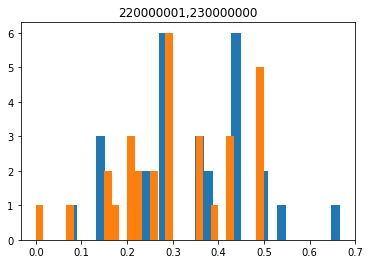

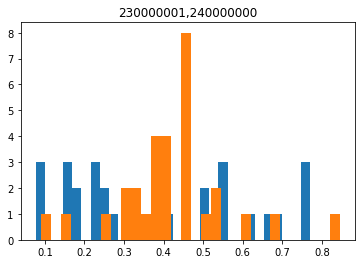

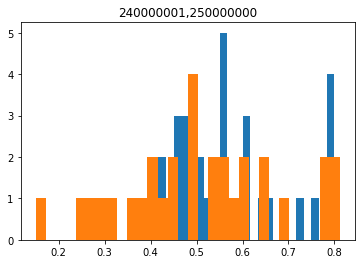

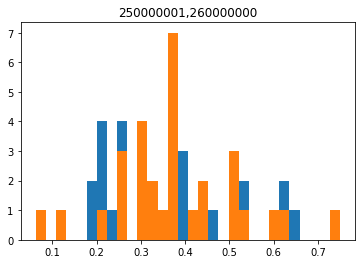

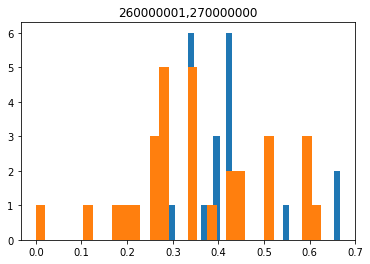

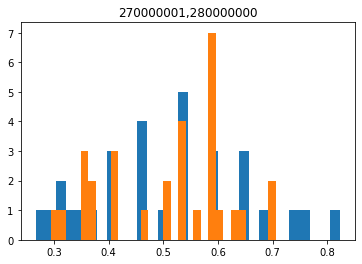

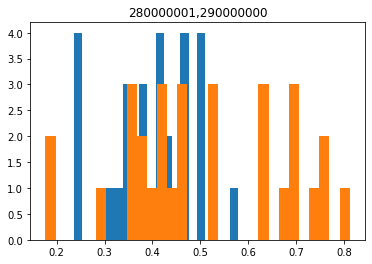

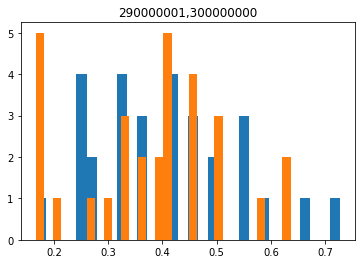

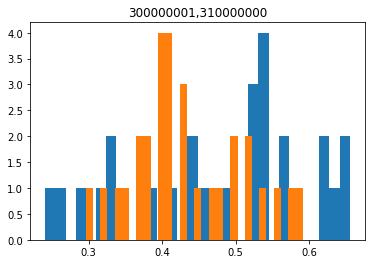

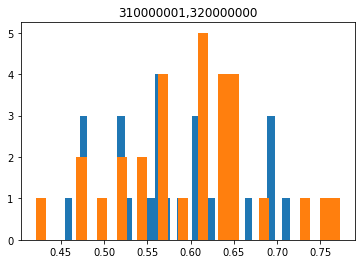

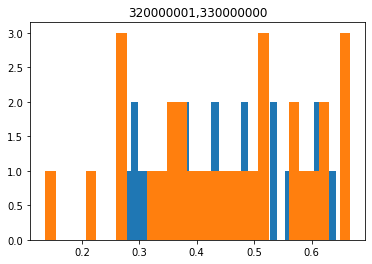

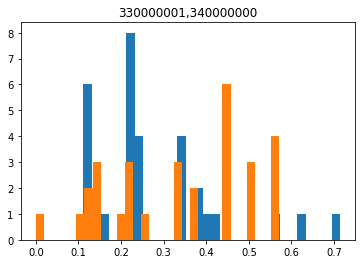

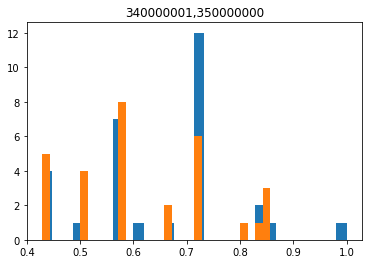

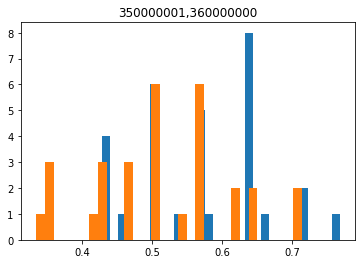

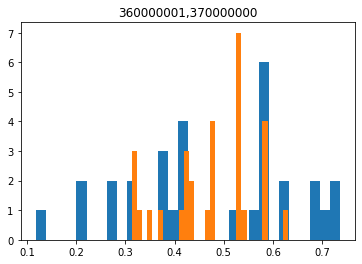

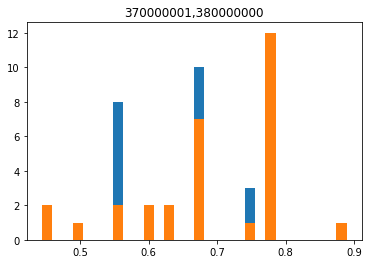

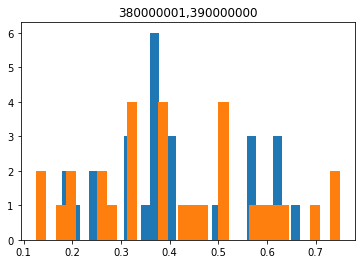

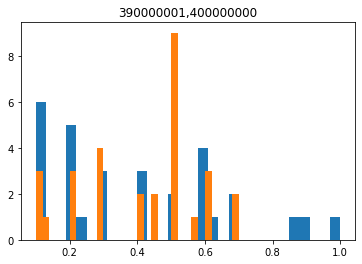

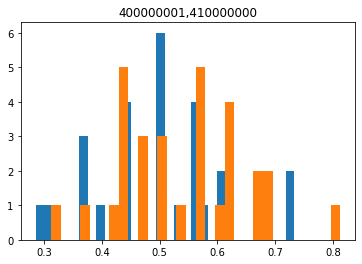

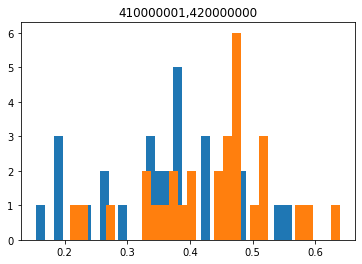

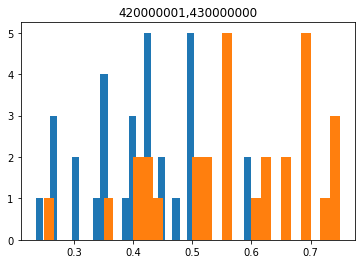

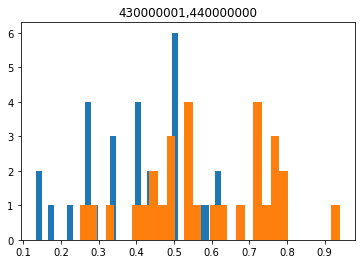

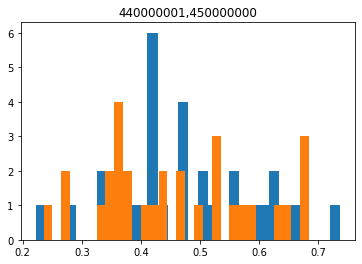

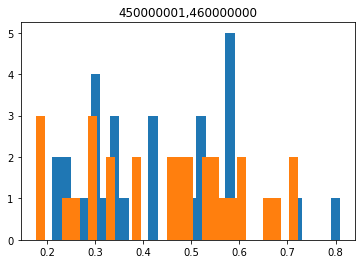

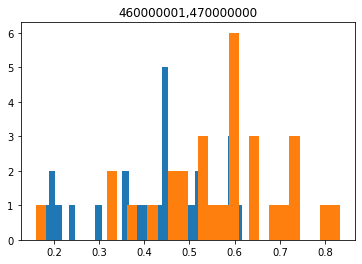

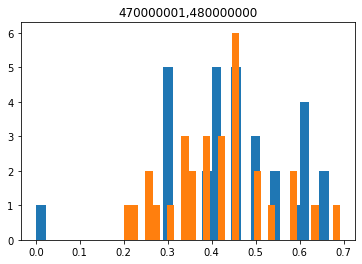

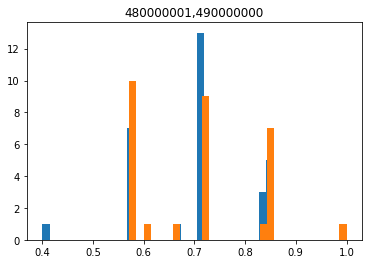

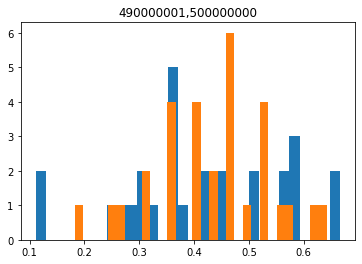

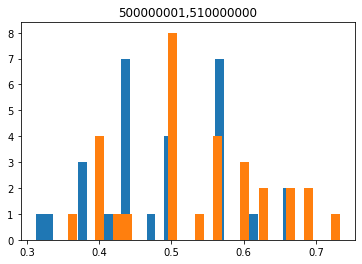

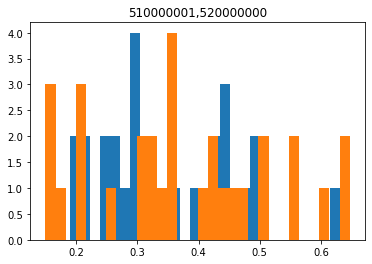

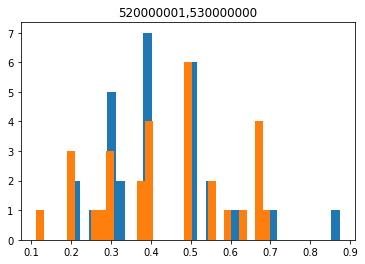

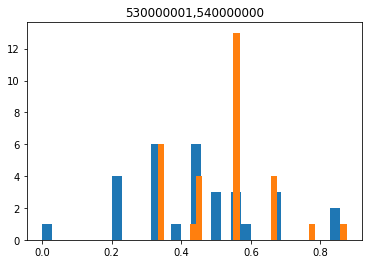

In [123]:
for window in window_dict:
    
    M_hets = []
    F_hets = []

    for sample in window_dict[window]["samples"]:
        if sex_dict[sample] == "M":
            M_hets.append(window_dict[window]["samples"][sample]["heterozygosity"])
        elif sex_dict[sample] == "F":
            F_hets.append(window_dict[window]["samples"][sample]["heterozygosity"])
            
    plt.hist(F_hets, bins = 30)
    plt.hist(M_hets, bins = 30)
    
    distrib = M_hets+F_hets
    intervals = UniDip(distrib).run()
    
    if len(intervals) > 1:
        plt.title("%s, N modes = %s" %(window, len(intervals)))
    else:
        plt.title(window)
    plt.show()

In [124]:
distrib = M_hets+F_hets

intervals = UniDip(distrib).run()
intervals

[]

So that didn't work, I guess is a combination of there being not enough sex linked markers and too few loci. 

Is there anything I could do to clean up the loci used for this first? Maybe have a minor allele frequency cut off? E.g. if we assume that most males will be het for the same loci, then the minor allele should be present in about 1 copy in all males, so about 25%? So what about a minor allele freq cut off of 15%?

But perhaps its better first to try a PCA approach, where I use consistently sex linked markers to try to cluster unsexed samples. 